# Desicsion trees using Packages

## Import Packages

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import math 

## Import data 

In [2]:
#the way the data is stored in the iris package means you cant go directly from load to data frame. Target name is a key and a dimision
#of 3 vs 150 so you canot create data frame. That is why target is created as an individual columna and a dict is used to map a 
#categorical column based off of targets name. 
data = load_iris(as_frame=True)
Final=pd.DataFrame(data.data)
flower_map= dict(zip([0, 1, 2], data.target_names))
Final["flower"]=pd.DataFrame(data.target)
Final["flowername"]= Final["flower"].map(flower_map)

Final

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),flower,flowername
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


## Split data 

In [3]:
X = Final.iloc[:, :4]
y = Final.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, shuffle=True, random_state=24)

## Run packages 

In [4]:
decision_tree = DecisionTreeClassifier(random_state=0, max_depth=2)
decision_tree = decision_tree.fit(X_train, y_train)
#tree.plot_tree(decision_tree)

[Text(0.4, 0.8333333333333334, 'X[3] <= 0.8\ngini = 0.663\nsamples = 112\nvalue = [38, 42, 32]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 38\nvalue = [38, 0, 0]'),
 Text(0.6, 0.5, 'X[3] <= 1.65\ngini = 0.491\nsamples = 74\nvalue = [0, 42, 32]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.127\nsamples = 44\nvalue = [0, 41, 3]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.064\nsamples = 30\nvalue = [0, 1, 29]')]

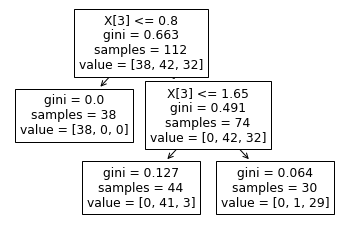

In [5]:
from sklearn import tree
tree.plot_tree(decision_tree)

## Evaluate 

In [6]:
y_preds = decision_tree.predict(X_test)
PackageAccuracy=accuracy_score(y_test, y_preds)
print("Package Implementation:",PackageAccuracy)

Package Implementation: 0.9473684210526315


# Decision tree from scratch

In [7]:
#function to split the data to true/false
# This is what tells the model if the data should go to the left or right branch
def split(criteria,Xdata,Ydata,feature): 
    true=np.empty((0,2))
    false=np.empty((0,2))
    for i in range(len(Xdata)):
        if Xdata[feature].iloc[i]<=criteria:
            insertarrary=np.array([Xdata[feature].iloc[i],Ydata.iloc[i]])
            true=np.vstack([true,insertarrary])
        else: 
            insertarrary=np.array([Xdata[feature].iloc[i],Ydata.iloc[i]])
            false=np.vstack([false,insertarrary])
    return true,false

In [8]:
#Testing the splitting data
true,false=split(1.3,X_train,y_train,'petal width (cm)')
true

array([['1.3', 'versicolor'],
       ['1.3', 'versicolor'],
       ['1.2', 'versicolor'],
       ['0.2', 'setosa'],
       ['0.4', 'setosa'],
       ['0.2', 'setosa'],
       ['1.1', 'versicolor'],
       ['1.3', 'versicolor'],
       ['0.1', 'setosa'],
       ['0.3', 'setosa'],
       ['0.2', 'setosa'],
       ['0.2', 'setosa'],
       ['0.1', 'setosa'],
       ['0.4', 'setosa'],
       ['1.2', 'versicolor'],
       ['1.0', 'versicolor'],
       ['1.3', 'versicolor'],
       ['0.6', 'setosa'],
       ['0.2', 'setosa'],
       ['1.3', 'versicolor'],
       ['1.1', 'versicolor'],
       ['1.1', 'versicolor'],
       ['1.0', 'versicolor'],
       ['0.4', 'setosa'],
       ['0.2', 'setosa'],
       ['0.1', 'setosa'],
       ['1.3', 'versicolor'],
       ['0.5', 'setosa'],
       ['1.0', 'versicolor'],
       ['0.2', 'setosa'],
       ['1.3', 'versicolor'],
       ['1.0', 'versicolor'],
       ['0.2', 'setosa'],
       ['0.2', 'setosa'],
       ['0.2', 'setosa'],
       ['0.4', 'setosa'],


In [9]:
#function to calculate the Entropy for information gain
#entropy is how pure the node is, the lower the better. 
# this function also provides the split of data to true and false so it can be used as the weights in the information loss formula 
# the entropy formula uses the category percentages for the splits for its probability portion, which is why we use the unique function
def entropy(true,false): 
    #find fractions of splits for true
    counts=np.unique(true[:,1], return_counts=True)
    #true[:,1]
    counts=np.array(counts)
    counts=np.transpose(counts)
    results=[]
    truprob= len(true)/(len(true)+len(false))
    falseprob=len(false)/(len(true)+len(false))
    for i in range(len(counts)):
        results.append(int(counts[i,1])/len(true))
    entropytrue=[]
    for i in range(len(results)):
        entropytrue.append(-results[i]*math.log(results[i]))
        
    #find fractions of splits for true
    counts=np.unique(false[:,1], return_counts=True)
    counts=np.array(counts)
    counts=np.transpose(counts)
    results=[]
    for i in range(len(counts)):
        results.append(int(counts[i,1])/len(false))
    entropyfalse=[]
    for i in range(len(results)):
        entropyfalse.append(-results[i]*math.log(results[i]))    
    
    trueList=[]
    for i in range(len(entropytrue)):
        if abs(entropytrue[i])!=0:
            trueList.append(-(entropytrue[i]*math.log(entropytrue[i])))
        else: trueList.append(0)
    falseList=[]
    for i in range(len(entropyfalse)):
        if abs(entropyfalse[i])!=0:
            falseList.append(-(entropyfalse[i]*math.log(entropyfalse[i])))
        else: falseList.append(0)
            
            
    return sum(trueList),truprob,sum(falseList),falseprob

In [10]:
#test entropy
entropy(true,false)

(0.7308585367773555,
 0.5714285714285714,
 0.7214913545982902,
 0.42857142857142855)

In [11]:
#information gain
def InfoGain(childTrue, childFalse):
    childT, childTprob,childF,childFprob=entropy(childTrue,childFalse)
    return 1-(childT*childTprob+childF*childFprob)

In [12]:
#test InfoGain 
InfoGain(true,false)

0.2731559698708155

In [13]:
#function to find the best split for and individual feature
def bestsplit(feature,Xdata,Ydata):
    inputs = []
    list1=Xdata[feature]
    #np.array(Xdata.columns).tolist()
        # traverse for all elements
    for x in list1:
        # check if exists in unique_list or not
        if x not in inputs:
            inputs.append(x)
    
        results=np.empty((0,2))
    for i in range(len(inputs)):
        true2,false2=split(inputs[i],Xdata,Ydata,feature)
        output=InfoGain(true2,false2)
        step=np.array([output,inputs[i]])
        results=np.vstack([results,step])
    results=pd.DataFrame(results)
    results=results.sort_values(0,ascending=False)
    results=results.head(1)
    results=results.rename(columns={0: "InfoGain", 1: "Variable"})
    results["Feature"]=feature
    return results


In [14]:
#Testing the best split for an individual feature 
bestsplit('petal width (cm)',X_train,y_train)

,InfoGain,Variable,Feature
13,0.515921,0.6,petal width (cm)


In [15]:
#find the best feature out of all features to pick next 
# is looking through all the possible features using the best split feature from above to find the best feature and value
def NextNode(Xdata,Ydata):
    list2=Xdata.columns
    final=pd.DataFrame()
    for i in range(len(list2)):
        final=pd.concat([final,bestsplit(list2[i],Xdata,Ydata)],axis=0)
    return final.sort_values('InfoGain').tail(1)

In [16]:
# test NextNode
NextNode(X_train,y_train)

,InfoGain,Variable,Feature
13,0.515921,0.6,petal width (cm)


In [17]:
###Application of creating the tree by hand
## chose to show all the functions interacting by hand becuase I find it easier to understand. 

#this chunk is finding the root node, looking through all the features and values to find the optiamal first split. 
#is also creates a dataframe that will contain all the splits and what level they are fo. 
DF=pd.DataFrame()
tochose=NextNode(X_train,y_train)
tochose['NodeLevel']="Root"
tochose['T/F']="Root"
DF=DF.append(tochose)
print(tochose)


#The data now has to be split based on the above chunk of codes results to get the true and false branch data. 
#once data is split the formuals are re-ran to see the next split and feature. 
#this is bascily making the first layer of the tree and yo uwould only expect two nodes max from it 
XData=X_train
YData=y_train
feature=tochose['Feature'].values
feature=feature[0]
cut=float(tochose["Variable"])
print(feature)
DatatoSplit=pd.concat([XData,YData],axis=1)
true=DatatoSplit[DatatoSplit[feature]<=cut]
false=DatatoSplit[DatatoSplit[feature]>cut]
#must remove what variable is from the stump 
TY=true.iloc[:, -1]
TX=true.drop(columns=[feature,'flowername'])
FY=false.iloc[:, -1]
FX=false.drop(columns=[feature,'flowername'])
## running to get the next node for both true and false nodes off the root node 
NextTrue=NextNode(TX,TY)
NextFalse=NextNode(FX,FY)
NextTrue['NodeLevel']="Layer1"
NextTrue['T/F']="True"
NextFalse['NodeLevel']="Layer1"
NextFalse['T/F']="False"
DF=DF.append(NextTrue)
DF=DF.append(NextFalse)
print(NextTrue,NextFalse)


#next round, this is creating the second layer. becuase it can stem off of either the true or false node from the first layer, you 
#would expect at max 4 modes but if a pure node occured in layer 1, 
#four nodes are not always returned. this code is repeating all the same steps as what it did to create layer 1 but it has if logic to
#stop splitting incase it was trying to stem off a pure node. 
#Steaming off of false parent 
if NextFalse['InfoGain'].values[0]!=1: 
    feature2=NextFalse['Feature'].values
    feature2=feature2[0]
    cut=float(NextFalse["Variable"])
    
    DatatoSplit=pd.concat([FX,FY],axis=1)
    true=DatatoSplit[DatatoSplit[feature2]<=cut]
    false=DatatoSplit[DatatoSplit[feature2]>cut]
    
    TY2=true.iloc[:, -1]
    TX2=true.drop(columns=[feature2,'flowername'])
    
    FY2=false.iloc[:, -1]
    FX2=false.drop(columns=[feature2,'flowername'])
    
    NextTrue2=NextNode(TX2,TY2)
    NextFalse2=NextNode(FX2,FY2)
    NextTrue2['NodeLevel']="FalseLayer2"
    NextTrue2['T/F']="True"
    NextFalse2['NodeLevel']="FalseLayer2"
    NextFalse2['T/F']="False"
    DF=DF.append(NextTrue2)
    DF=DF.append(NextFalse2)

    print (NextTrue2,NextFalse2)

 
    

#Steaming off of true parent--True child from root is pure so do not go further 
if NextTrue['InfoGain'].values[0]!=1:
    feature2=NextTrue['Feature'].values
    feature2=feature2[0]
    cut=float(NextTrue["Variable"])
    DatatoSplit=pd.concat([TX,TY],axis=1)
    true=DatatoSplit[DatatoSplit[feature2]<=cut]
    false=DatatoSplit[DatatoSplit[feature2]>cut]
    
    TY=true.iloc[:, -1]
    TX=true.drop(columns=[feature2,'flowername'])
    
    FY=false.iloc[:, -1]
    FX=false.drop(columns=[feature2,'flowername'])
    
    NextTrue3=NextNode(TX,TY)
    NextFalse3=NextNode(FX,FY)
    
    NextTrue3['NodeLevel']="TrueLayer2"
    NextTrue3['T/F']="True"
    
    NextFalse3['NodeLevel']="FalseLayer2"
    NextFalse3['T/F']="False"
    
    DF=DF.append(NextTrue3)
    DF=DF.append(NextFalse3)

    print(NextTrue3,NextFalse3)



    InfoGain  Variable           Feature NodeLevel   T/F
13  0.515921       0.6  petal width (cm)      Root  Root
petal width (cm)
   InfoGain  Variable            Feature NodeLevel   T/F
0       1.0       1.0  petal length (cm)    Layer1  True     InfoGain  Variable            Feature NodeLevel    T/F
12  0.556945       4.7  petal length (cm)    Layer1  False
    InfoGain  Variable            Feature    NodeLevel   T/F
13       1.0       4.9  sepal length (cm)  FalseLayer2  True    InfoGain  Variable            Feature    NodeLevel    T/F
0  0.514676       6.9  sepal length (cm)  FalseLayer2  False


In [18]:
DF

,InfoGain,Variable,Feature,NodeLevel,T/F
13,0.515921,0.6,petal width (cm),Root,Root
0,1.000000,1.0,petal length (cm),Layer1,True
12,0.556945,4.7,petal length (cm),Layer1,False
13,1.000000,4.9,sepal length (cm),FalseLayer2,True
0,0.514676,6.9,sepal length (cm),FalseLayer2,False


# Comparison

In [19]:
#testing the results of my tree
Data=pd.concat([X_test,y_test],axis=1)

In [20]:
#First split from root is to split petal width (cm) by .6
#pure node 100% accureacy for this group 12/12 correct 
Data[Data['petal width (cm)']<=.6]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),flowername
11,4.8,3.4,1.6,0.2,setosa
48,5.3,3.7,1.5,0.2,setosa
29,4.7,3.2,1.6,0.2,setosa
30,4.8,3.1,1.6,0.2,setosa
19,5.1,3.8,1.5,0.3,setosa
26,5.0,3.4,1.6,0.4,setosa
14,5.8,4.0,1.2,0.2,setosa
31,5.4,3.4,1.5,0.4,setosa
1,4.9,3.0,1.4,0.2,setosa
49,5.0,3.3,1.4,0.2,setosa


In [21]:
#Pure node of Versicolor so 6/6 correct 
Data[(Data['petal width (cm)']>.6) & (Data['petal length (cm)']<=4.7)]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),flowername
57,4.9,2.4,3.3,1.0,versicolor
59,5.2,2.7,3.9,1.4,versicolor
51,6.4,3.2,4.5,1.5,versicolor
78,6.0,2.9,4.5,1.5,versicolor
92,5.8,2.6,4.0,1.2,versicolor
84,5.4,3.0,4.5,1.5,versicolor


In [22]:
#assumes all are Virginica becuase its the majority, only two wrong 18/20 correct 
Data[(Data['petal width (cm)']>.6) & (Data['petal length (cm)']>4.7)]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),flowername
107,7.3,2.9,6.3,1.8,virginica
114,5.8,2.8,5.1,2.4,virginica
105,7.6,3.0,6.6,2.1,virginica
72,6.3,2.5,4.9,1.5,versicolor
148,6.2,3.4,5.4,2.3,virginica
111,6.4,2.7,5.3,1.9,virginica
144,6.7,3.3,5.7,2.5,virginica
103,6.3,2.9,5.6,1.8,virginica
104,6.5,3.0,5.8,2.2,virginica
120,6.9,3.2,5.7,2.3,virginica


In [23]:
#12/12 correct for setosa, 6/6 correct for Versicolor and 18/20 correct for Virginica
#Same sccuracty results! but not as good as results as Sklern but its not optimized 
(12+6+18)/len(Data)

0.9473684210526315

In [24]:
PackageAccuracy

0.9473684210526315